In [1]:
import torch

In [2]:
import torchvision

In [3]:
def transform(data):
    data = torch.tensor(data.getdata(), dtype=torch.float32)
    return torch.floor(data / 128.).squeeze(axis=-1)

In [4]:
mnist_train = torchvision.datasets.MNIST('.', train=True, transform=transform, download=True)
mnist_test  = torchvision.datasets.MNIST('.', train=False, transform=transform, download=True)

Processing...
Done!


In [5]:
mnist_train[0]

(tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 1., 1.,
         1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
         1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0.,
         0., 0., 0., 0., 0.,

In [6]:
mnist_train[0][0].shape

torch.Size([784])

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline

In [8]:
mnist_train[0][0]

tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 1., 1.,
        1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 

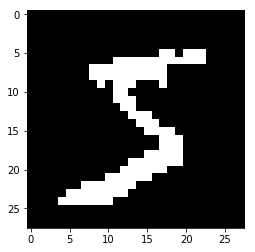

In [9]:
plt.imshow(mnist_train[0][0].reshape(28, 28), cmap='gray', vmin=0, vmax=1)

## ДЗ - реализуйте сами (без использования SKLEARN) наивный баесовский классификатор для классов 1 и 2

In [10]:
import pandas as pd
import numpy as np

In [80]:
# Напишем функцию обучения наивного байеса на 2х классах датасета
def NB_train(mnist_train):
    imgs1 = []
    imgs2 = []
    labels1 =[]
    labels2 = []
    for i in mnist_train:
        img, label = i
        if label== 1:
            imgs1.append(img)
            labels1.append(label)
        if label == 2:
            imgs2.append(img)
            labels2.append(label)            
    sum_features1 = sum(imgs1)
    sum_features2 = sum(imgs2)
    sum_total = sum_features1+sum_features2
    total1 = sum(sum_features1)
    total2 = sum(sum_features2)
    probs1 = sum_features1/total1
    probs2 = sum_features2/total2
    P1 = total1/sum(sum_total)
    P2 = total2/sum(sum_total)
    
    #counts = pd.DataFrame(labels1+labels2)[0].value_counts()
    #probs = {}
    #for i in range(1,3):
    #    probs[i] = counts[i]/sum(counts[0:2])
    return probs1, probs2, P1, P2, sum_features1, sum_features2, total1, total2, sum_total, imgs1, imgs2, labels1, labels2 

In [81]:
# Заберем из функции все суммы по всем фичам и тоталы
probs1, probs2, P1, P2, sum_features1, sum_features2, \
total1, total2, sum_total, imgs1, imgs2, labels1, labels2 = NB_train(mnist_train)

In [82]:
#Проверим что тоталы по классам и по фичам - совпадают
total1+total2 == sum(sum_total)

tensor(True)

In [83]:
# найдем в датасете тензор с лейблом 2 и 1
print(mnist_train[5][1])
print(mnist_train[6][1])

tensor(2)
tensor(1)


In [84]:
# реализуем функцию прогноза
def NB_predict(tensor):
    pred_label = 0
    predict1 = probs1*tensor*P1
    predict2 = probs2*tensor*P2
    if sum(predict1)>=sum(predict2):
        pred_label = 1
    else: 
        pred_label = 2
    return pred_label

In [85]:
# проверим корректность прогноза
print(NB_predict(mnist_train[5][0]))
print(NB_predict(mnist_train[6][0]))

2
1


In [86]:
preds1 = []
for i in imgs1:
    pred = NB_predict(i)
    preds1.append(pred)

In [91]:
errors1 = []
for i in range(len(preds1)):
    if preds1[i] == 2:
        errors1.append(i)

In [107]:
print("Accuracy train 1 detect: ",1-len(errors1)/len(preds1))

Accuracy train 1 detect:  0.8957282705428656


In [98]:
# Найдем 15 ошибок
errors1[:15]

[5, 9, 21, 31, 64, 69, 70, 77, 99, 103, 106, 111, 126, 132, 134]

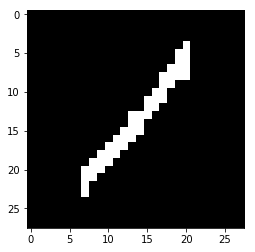

In [96]:
plt.imshow(imgs1[134].reshape(28, 28), cmap='gray', vmin=0, vmax=1)

In [97]:
preds2 = []
for i in imgs2:
    pred = NB_predict(i)
    preds2.append(pred)

In [99]:
errors2 = []
for i in range(len(preds2)):
    if preds2[i] ==1:
        errors2.append(i)

In [109]:
print("Accuracy train 2 detect: ",1-len(errors2)/len(preds2))

Accuracy train 2 detect:  0.9894259818731118


In [100]:
errors2[:15]

[15, 62, 125, 152, 196, 411, 440, 549, 731, 802, 821, 896, 1091, 1108, 1148]

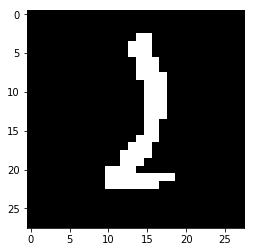

In [112]:
plt.imshow(imgs2[15].reshape(28, 28), cmap='gray', vmin=0, vmax=1)

In [116]:
print("Total Accuracy train: ",1-(len(errors2)+len(errors1))/(len(preds2)+len(preds1)))

Total Accuracy train:  0.9396850393700787


In [131]:
imgs1 = []
imgs2 = []
labels1 =[]
labels2 = []
for i in mnist_test:
    img, label = i
    if label== 1:
        imgs1.append(img)
    if label == 2:
        imgs2.append(img)

In [132]:
preds1 = []
for i in imgs1:
    pred = NB_predict(i)
    preds1.append(pred)

In [133]:
errors1 = []
for i in range(len(preds1)):
    if preds1[i] == 2:
        errors1.append(i)

Test errors:  [8, 13, 50, 69, 73, 74, 117, 125, 180, 195]


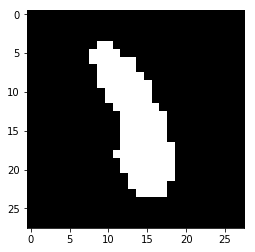

In [134]:
# Выведем 10 ошибок на тесте
err = errors1[:10]
print("Test errors: ",err)
plt.imshow(imgs1[err[5]].reshape(28, 28), cmap='gray', vmin=0, vmax=1)

In [135]:
preds2 = []
for i in imgs2:
    pred = NB_predict(i)
    preds2.append(pred)

In [136]:
errors2 = []
for i in range(len(preds2)):
    if preds2[i] ==1:
        errors2.append(i)

In [137]:
# Посчитаем метрику качества классификации на тесте:

print("Total Accuracy test: ",1-(len(errors2)+len(errors1))/(len(preds2)+len(preds1)))

Total Accuracy test:  0.9473927088140286
